<a href="https://www.kaggle.com/renanfioramonte/customer-segmentation?scriptVersionId=88594103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv("../input/tarea2/DatasetTrxs.csv")

### EDA & PREPROCESSING

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### REPLACING NULLS

<AxesSubplot:>

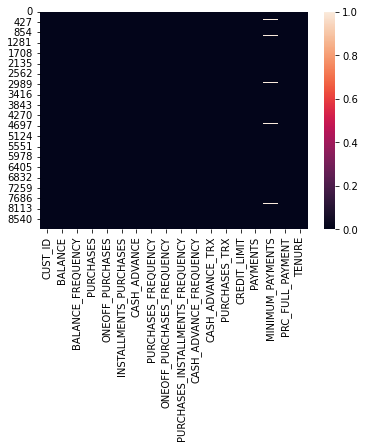

In [10]:
sns.heatmap(creditcard_df.isnull())

Null values in the 'MINIMUM_PAYMENTS'

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

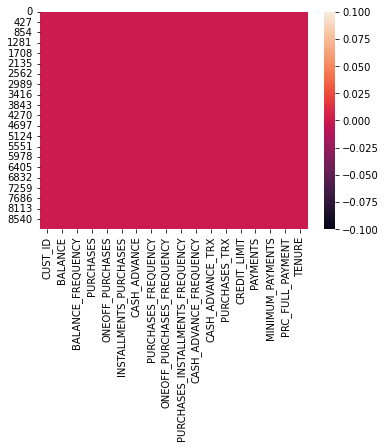

In [14]:
sns.heatmap(creditcard_df.isnull())

### FINDING DUPLICATES

In [15]:
creditcard_df.duplicated().sum()

0

### DROPPING UNECESSARY INFO

In [16]:
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [17]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### VISUALISATION AND EDA

In [18]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

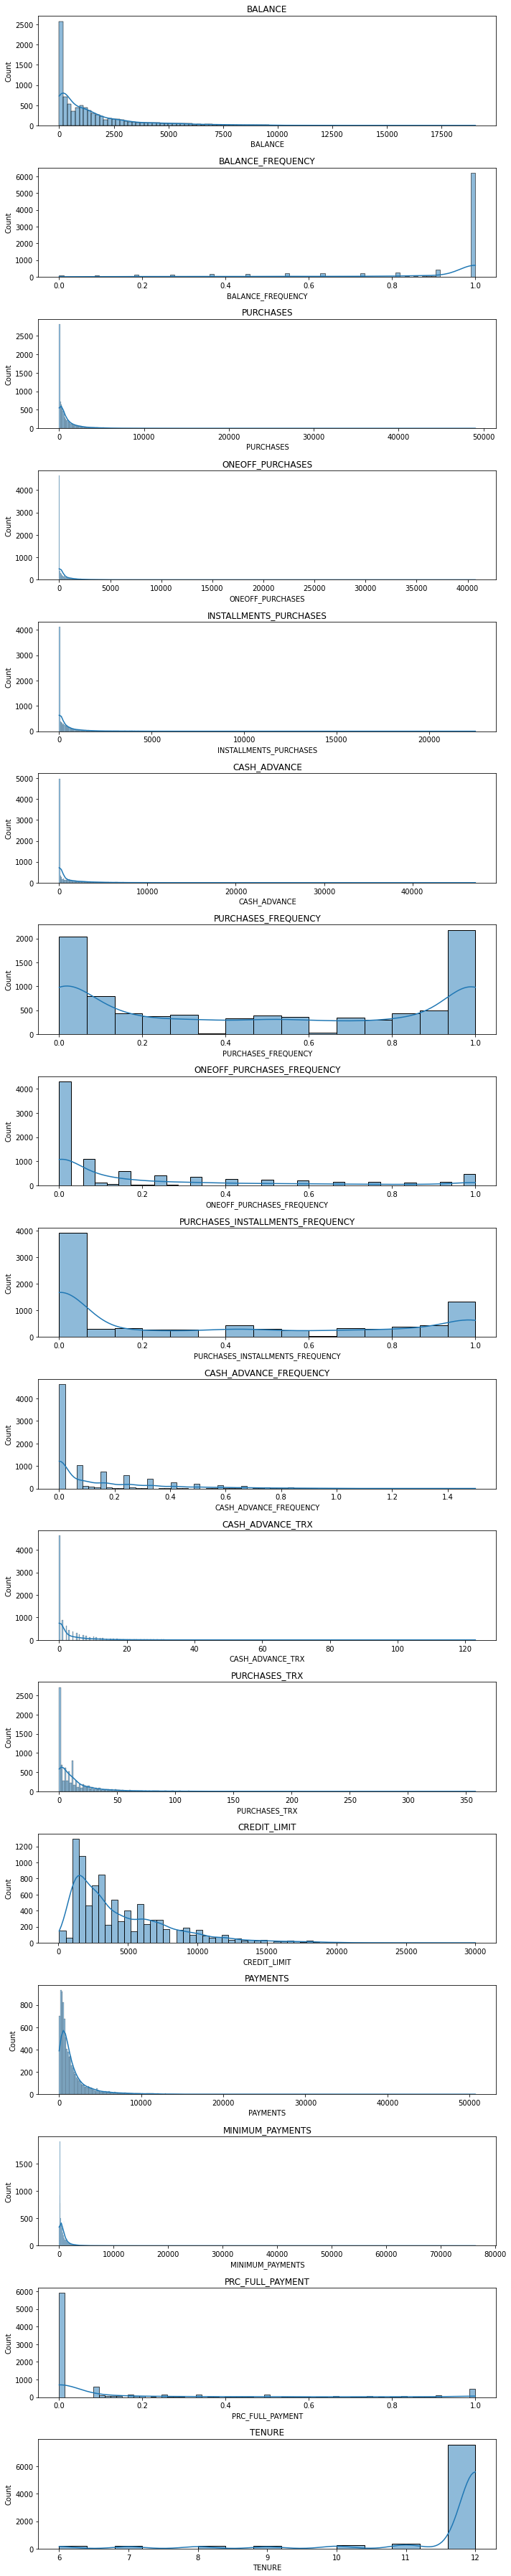

In [19]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [20]:
correlations = creditcard_df.corr()

<AxesSubplot:>

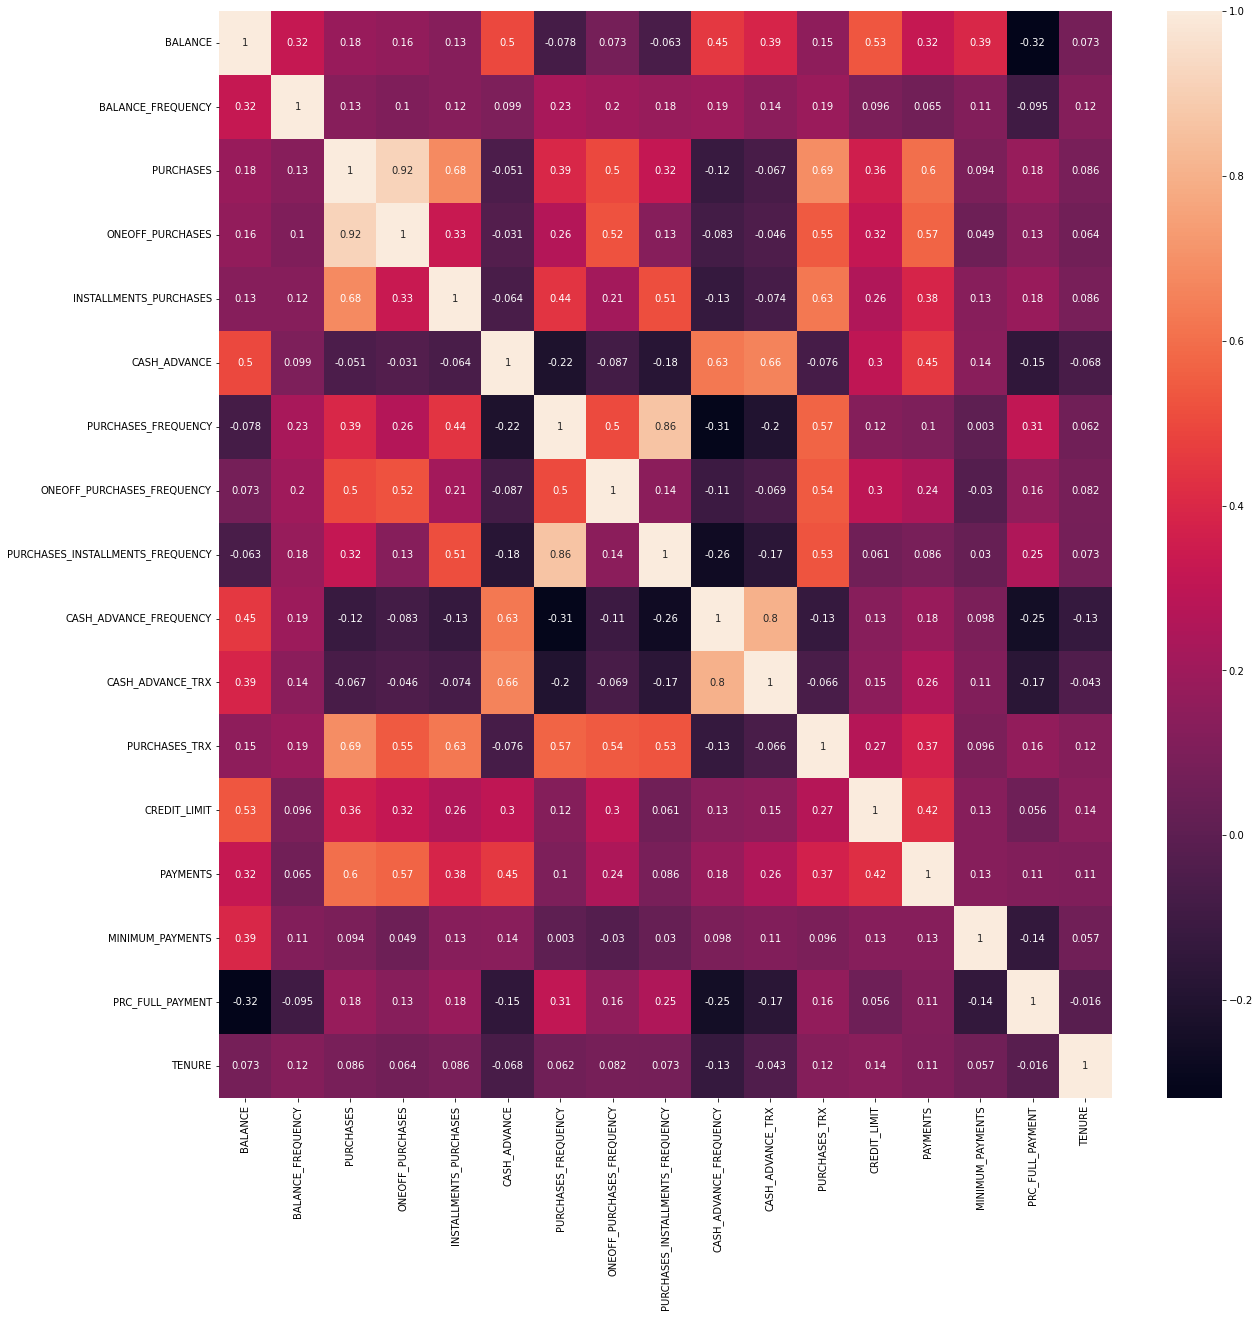

In [21]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

### DEFINING NUMBER OF CLUSTERS

In [22]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [23]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [24]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [25]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(creditcard_df_scaled)
        wcss_1.append(kmeans.inertia_)

In [26]:
print(wcss_1)

[152149.9999999988, 127785.42336776077, 111986.66935226753, 99073.93826774786, 91513.68594376829, 84851.29212769285, 79527.22649491891, 75016.53769141228, 70887.77274010083, 66447.09449416157, 63636.7441128373, 61386.56351652542, 59187.060221706495, 57484.3689624028, 55854.665298923224, 54602.81830762334, 53313.659603192245, 51923.39619946689, 50556.318521515765]


Text(0, 0.5, 'WCSS')

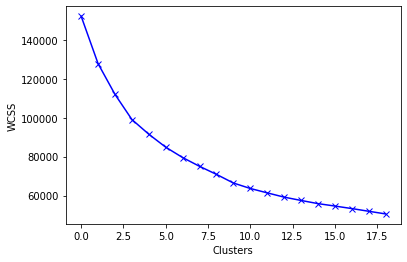

In [27]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Ideal number of clusters is around 7 and 8

### GROUPING WITH K-MEANS


In [28]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
labels, len(labels)

(array([1, 5, 7, ..., 3, 3, 3], dtype=int32), 8950)

In [30]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2026, 2814,   55,  629,   80,  901, 1187, 1258]))

In [31]:
kmeans.cluster_centers_

array([[-3.80464933e-01,  3.30129336e-01, -3.83077462e-02,
        -2.30746397e-01,  3.33176522e-01, -3.67443460e-01,
         9.83365773e-01, -3.48400799e-01,  1.17410646e+00,
        -4.76244155e-01, -3.61719726e-01,  1.71050191e-01,
        -2.72903352e-01, -2.22046080e-01, -1.10055623e-01,
         3.17776919e-01,  2.51507091e-01],
       [-3.29361058e-04,  4.01169554e-01, -3.41711141e-01,
        -2.22437159e-01, -3.99204099e-01, -1.13009636e-01,
        -8.05693023e-01, -3.32268464e-01, -7.50918018e-01,
         7.23077875e-02, -5.04699412e-02, -4.63538907e-01,
        -3.04187056e-01, -2.49675507e-01, -6.49231902e-02,
        -4.52493600e-01,  2.72518893e-01],
       [ 1.13559764e+00,  4.69241749e-01, -7.48064798e-02,
        -2.96768767e-01,  3.67637458e-01, -4.24150482e-02,
        -7.13659010e-02, -5.59998058e-01,  1.67463863e-01,
        -1.52909742e-01, -4.71192233e-02,  7.89698386e-02,
        -9.59196430e-02, -7.69948734e-02,  9.43658125e+00,
        -5.20370683e-01,  2.9

In [32]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.380465,0.330129,-0.038308,-0.230746,0.333177,-0.367443,0.983366,-0.348401,1.174106,-0.476244,-0.361720,0.171050,-0.272903,-0.222046,-0.110056,0.317777,0.251507
1,-0.000329,0.401170,-0.341711,-0.222437,-0.399204,-0.113010,-0.805693,-0.332268,-0.750918,0.072308,-0.050470,-0.463539,-0.304187,-0.249676,-0.064923,-0.452494,0.272519
2,1.135598,0.469242,-0.074806,-0.296769,0.367637,-0.042415,-0.071366,-0.559998,0.167464,-0.152910,-0.047119,0.078970,-0.095920,-0.076995,9.436581,-0.520371,0.292749
3,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
4,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
5,1.627389,0.393036,-0.206541,-0.148658,-0.215334,1.989468,-0.459434,-0.185682,-0.408918,1.925473,1.924289,-0.240341,0.996415,0.828212,0.367551,-0.389097,0.070408
6,-0.701601,-2.134228,-0.306958,-0.230688,-0.301869,-0.323078,-0.547104,-0.429080,-0.440569,-0.522249,-0.376815,-0.416364,-0.172669,-0.201414,-0.257348,0.295272,0.202040
7,0.140610,0.430553,0.952719,0.904791,0.590418,-0.307427,1.097469,1.881024,0.539846,-0.407957,-0.317187,1.211354,0.713158,0.396111,-0.050921,0.461783,0.307220


In [33]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,772.569185,0.955475,921.359743,209.445612,712.355039,208.325013,0.885023,0.098523,0.831057,0.039843,0.780355,18.961500,3501.515401,1090.342206,607.726555,0.246659,11.853899
1,1563.789290,0.972304,273.133714,223.237246,50.072331,741.884627,0.166987,0.103336,0.066003,0.149614,2.904407,3.187989,3387.692490,1010.357723,712.905786,0.021368,11.882018
2,3928.125451,0.988430,843.379636,99.862000,743.517636,889.924775,0.461708,0.035399,0.430992,0.104545,2.927273,16.672727,4145.454545,1510.251238,22855.761083,0.001515,11.909091
3,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
4,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,0.406617,11.962500
5,4951.748564,0.970377,561.926515,345.695316,216.344040,5150.878965,0.305957,0.147065,0.201923,0.520451,16.380688,8.735849,8119.816366,4130.737625,1720.769404,0.039910,11.611543
6,104.150638,0.371692,347.384364,209.543058,138.091348,301.361116,0.270771,0.074455,0.189344,0.030637,0.677338,4.360573,3866.208462,1150.071108,264.468397,0.240077,11.787700
7,1857.143114,0.979265,3038.704205,2094.205723,944.975429,334.183296,0.930818,0.763604,0.578986,0.053508,1.084261,44.819555,7089.210869,2879.845130,745.537412,0.288778,11.928458


In [34]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


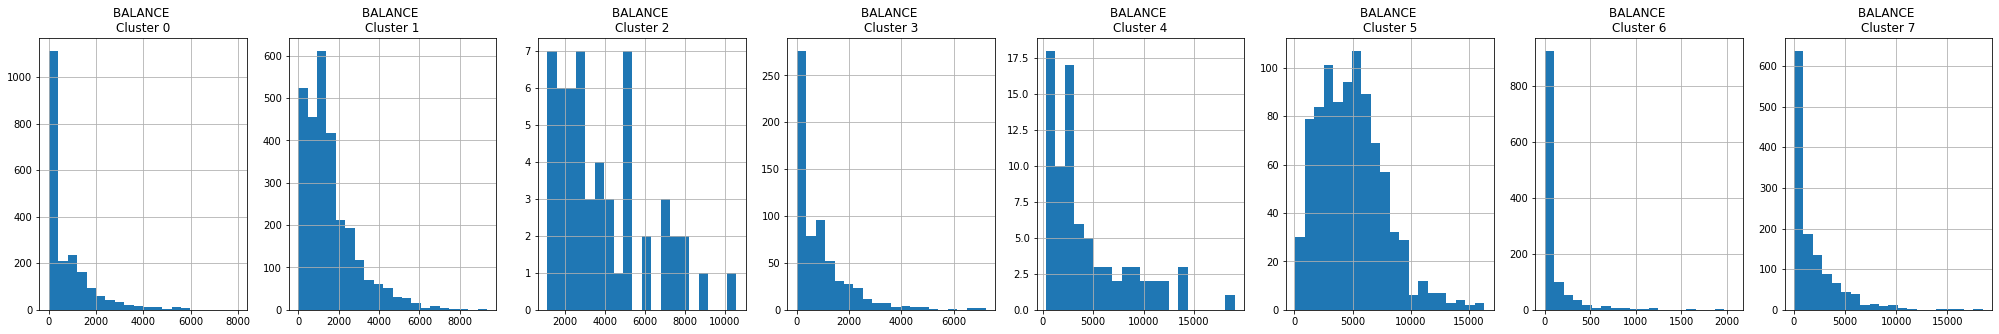

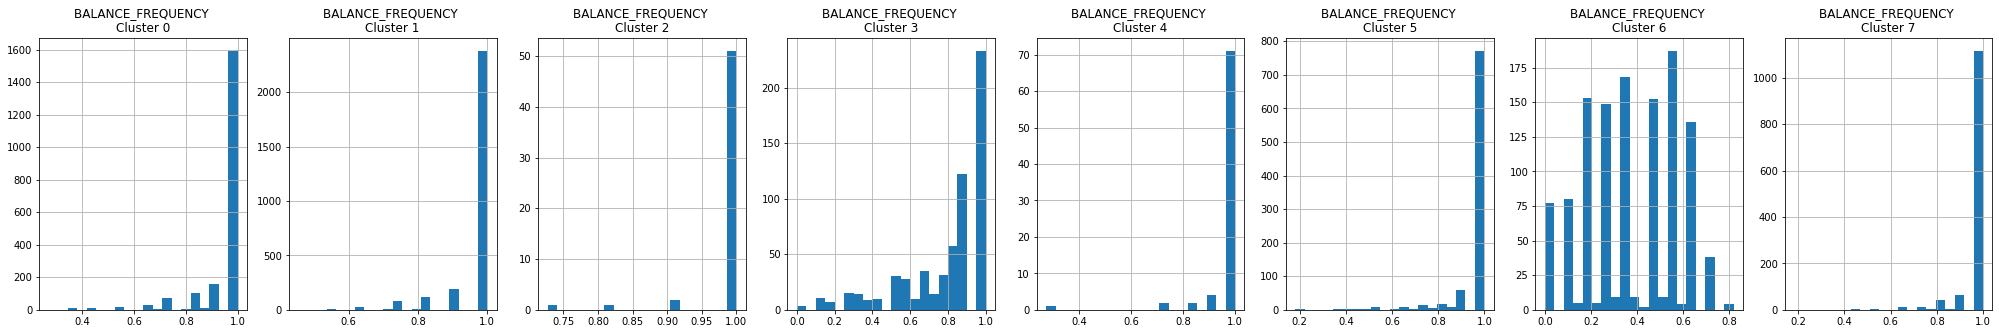

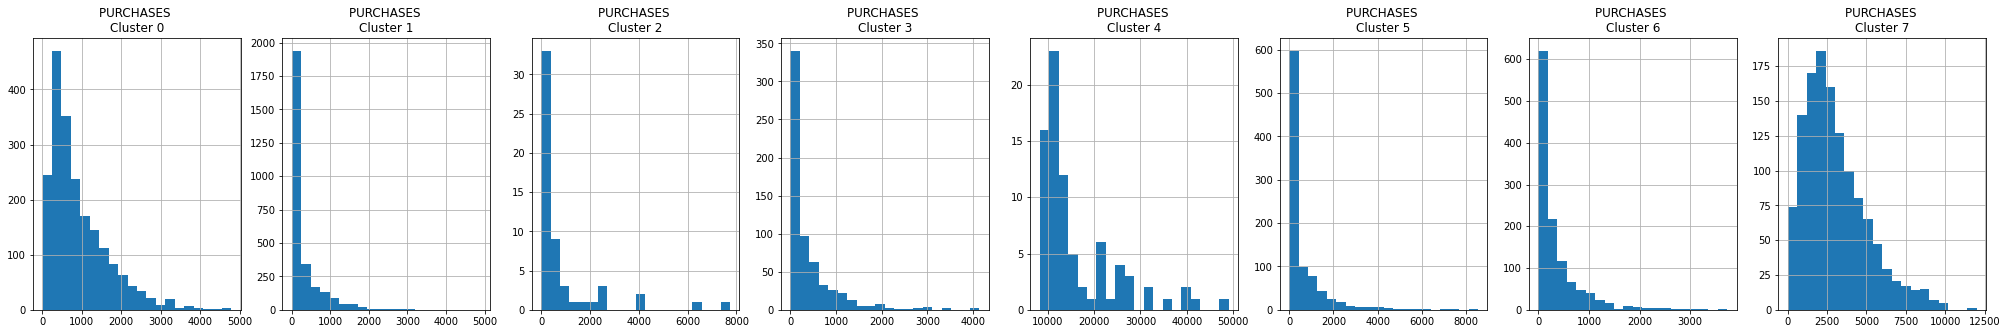

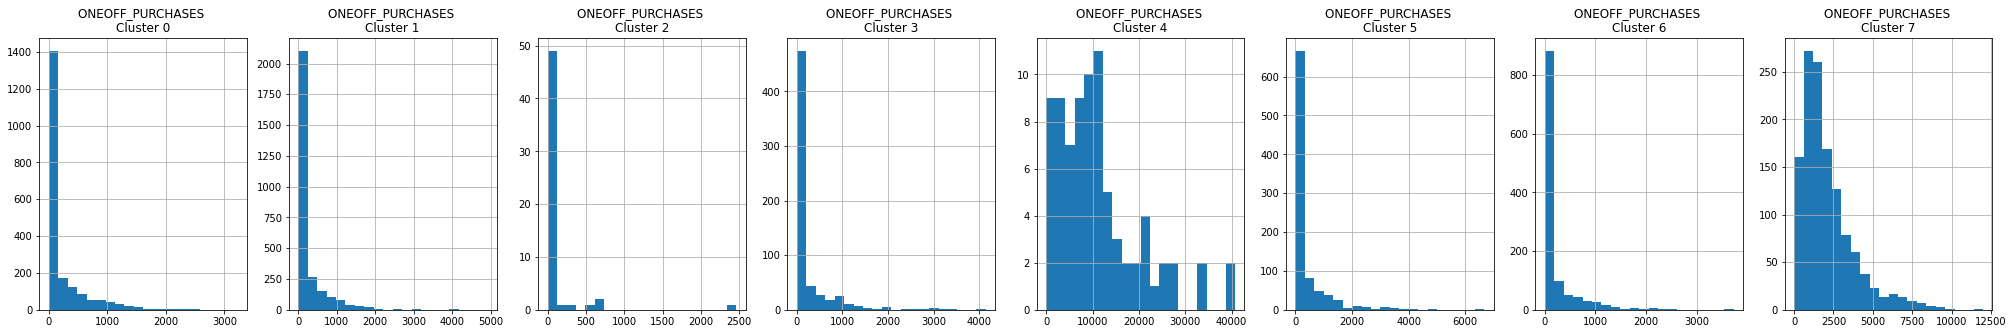

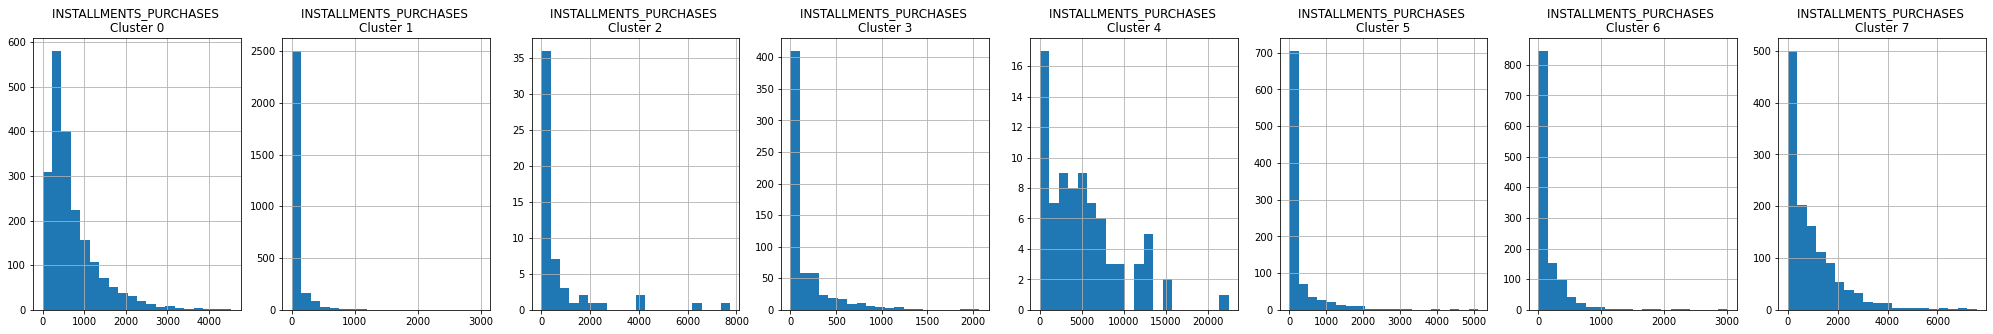

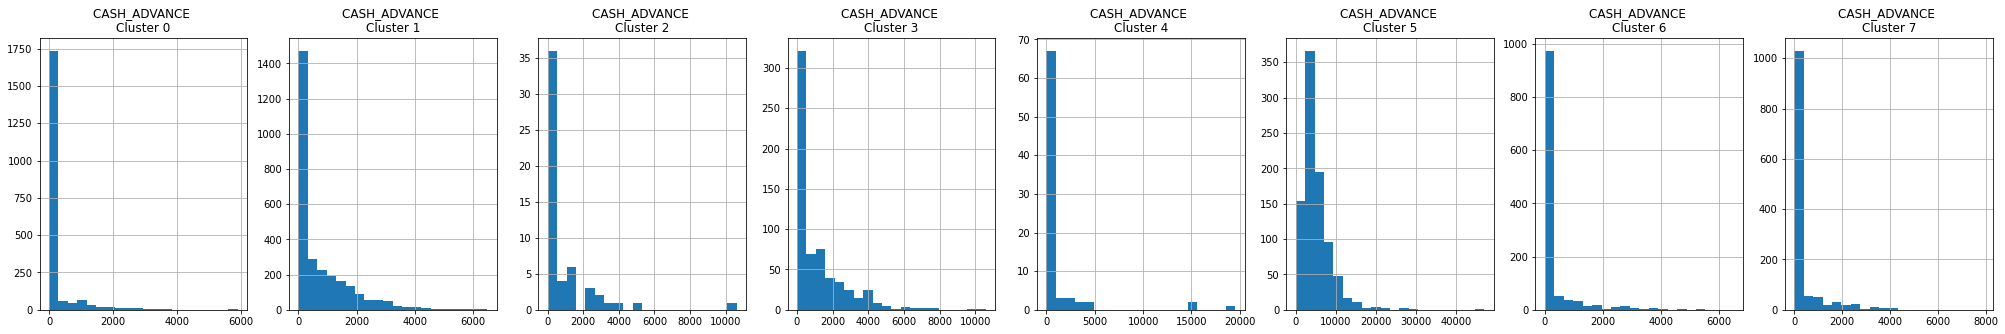

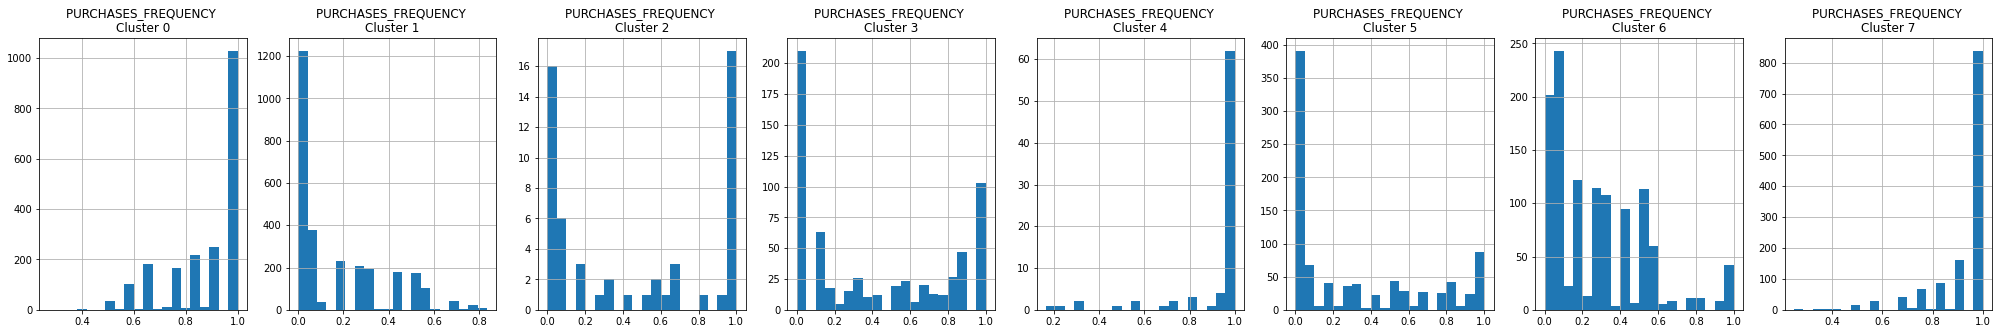

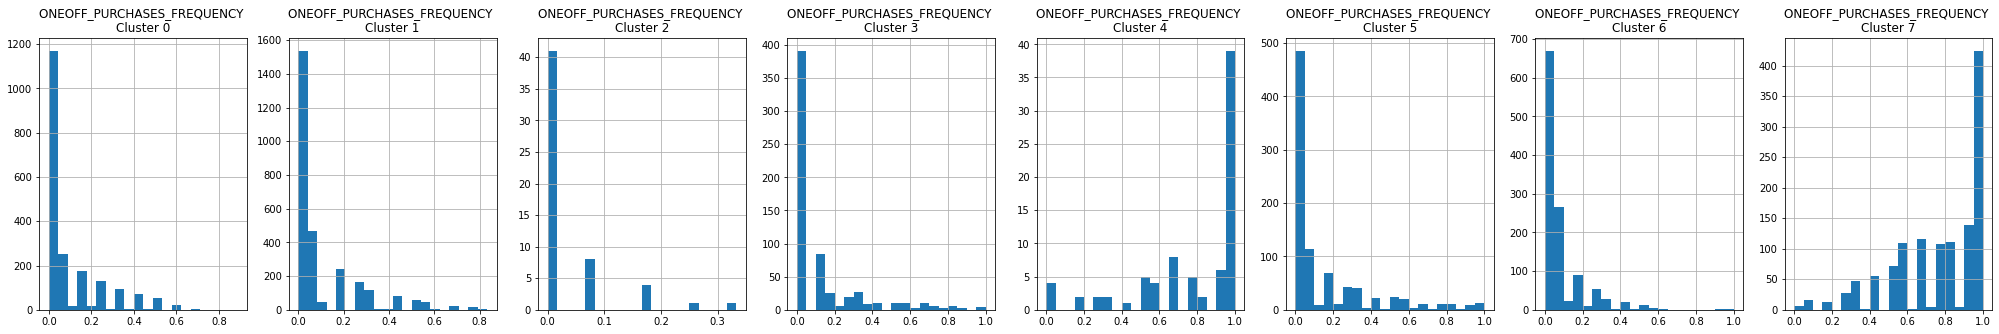

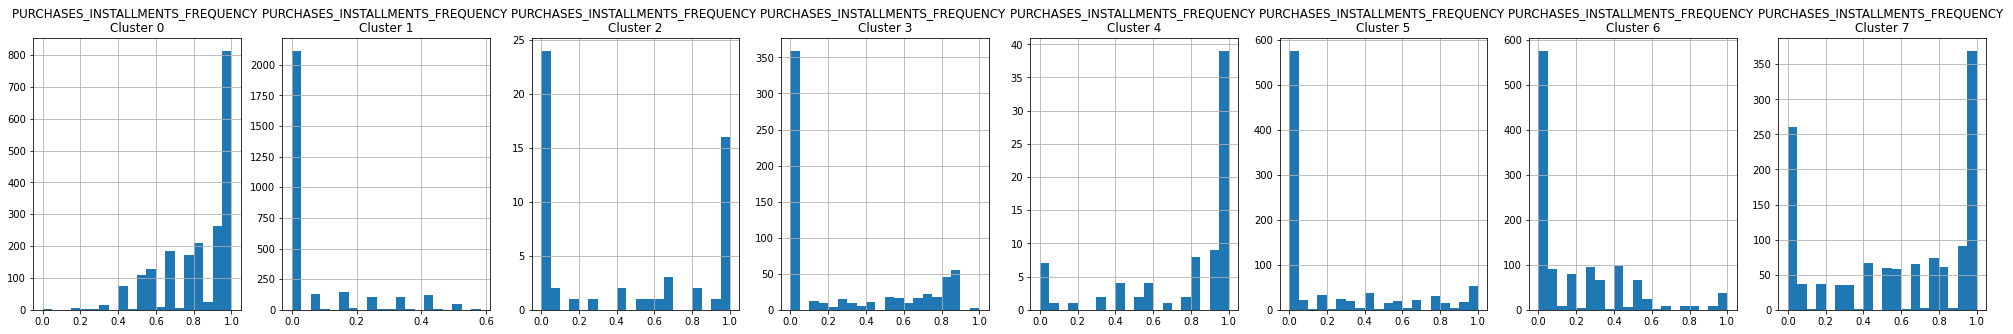

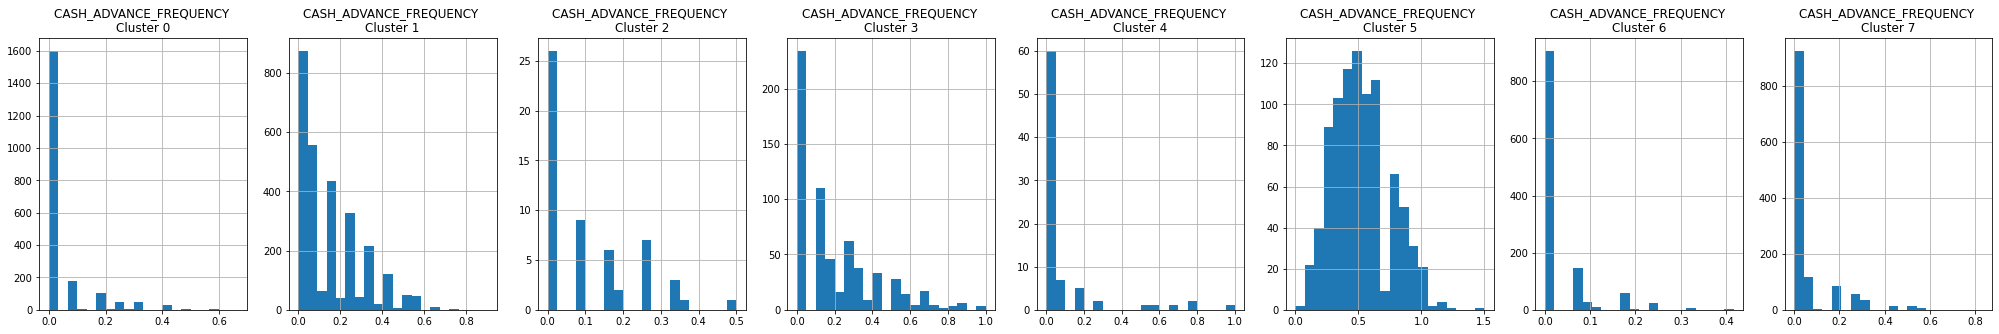

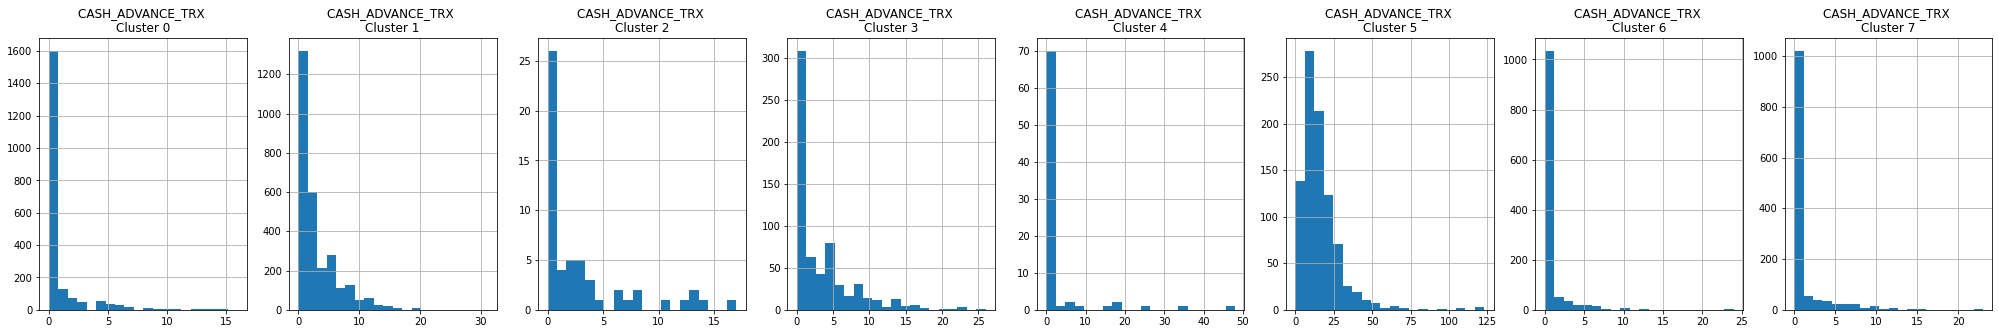

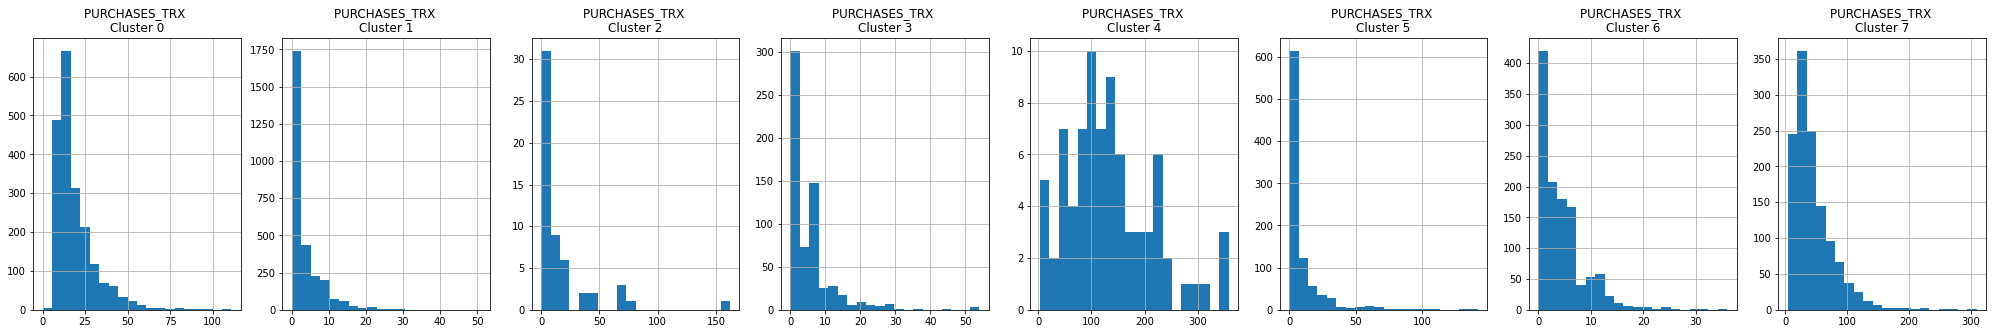

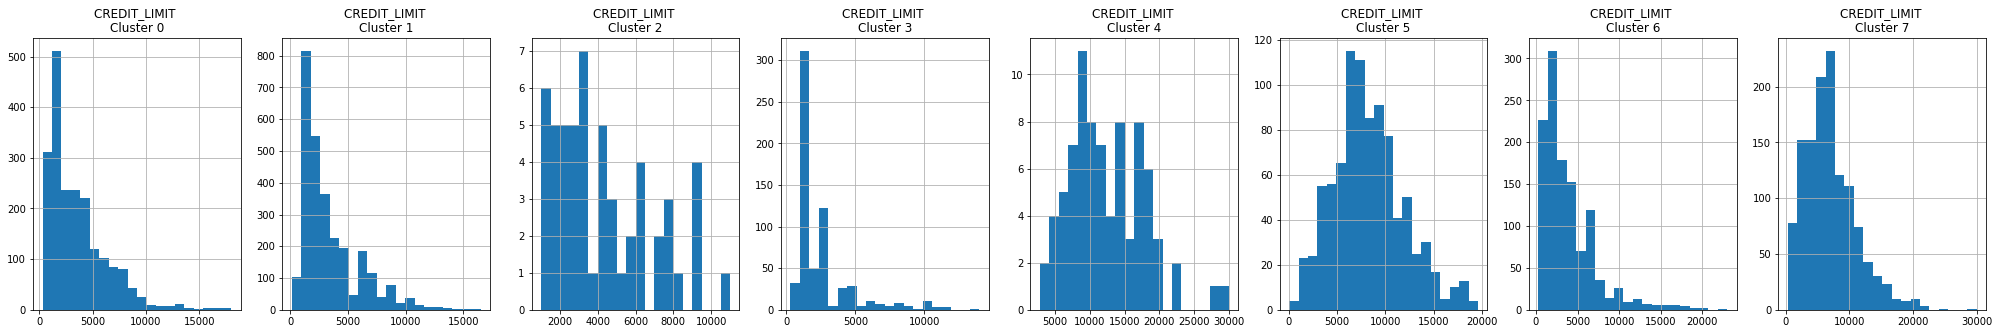

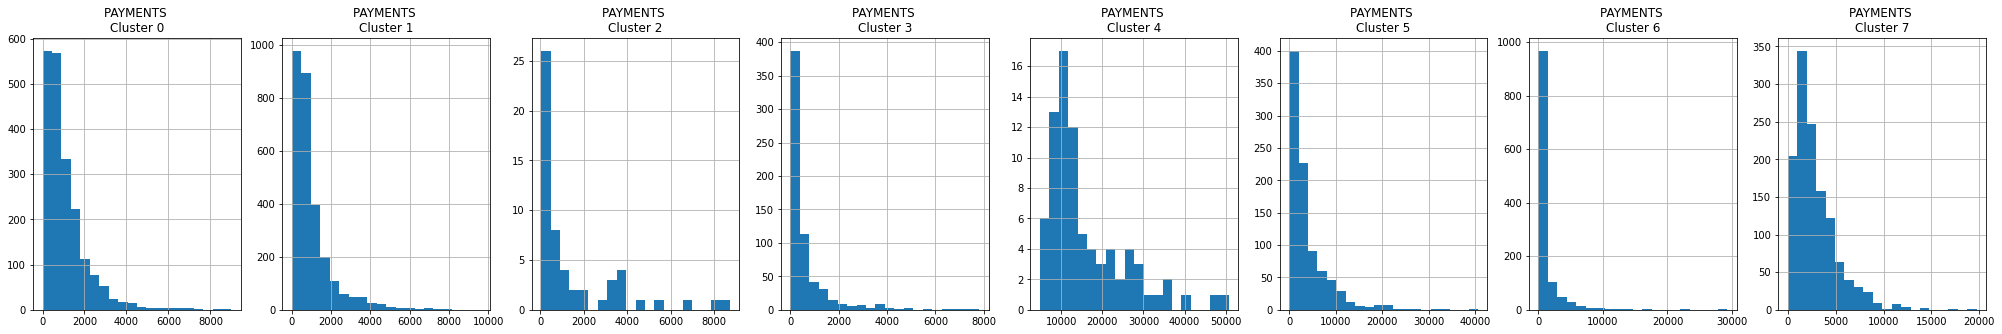

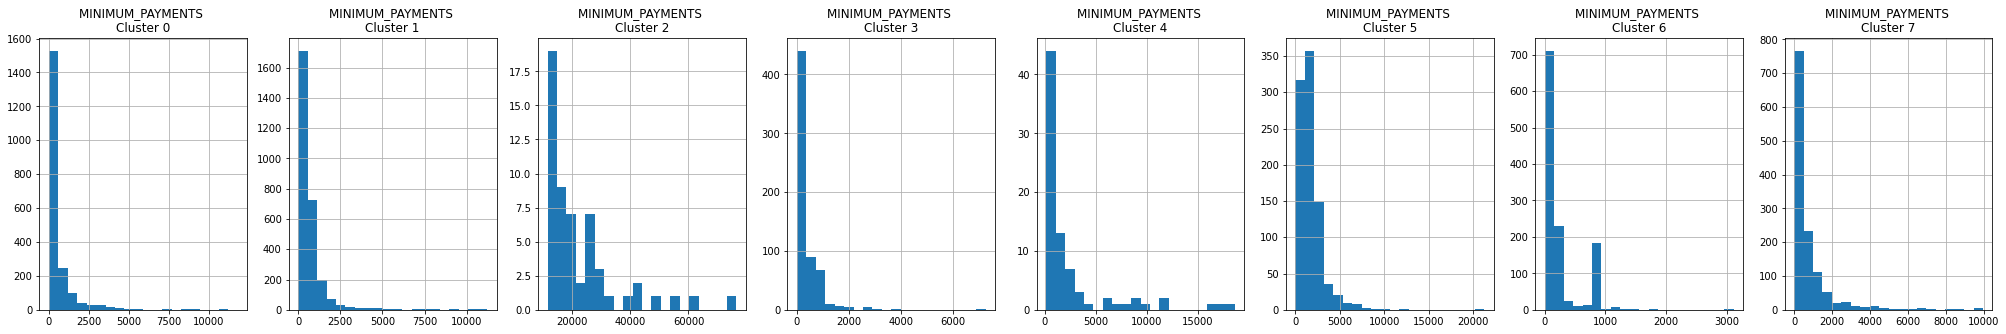

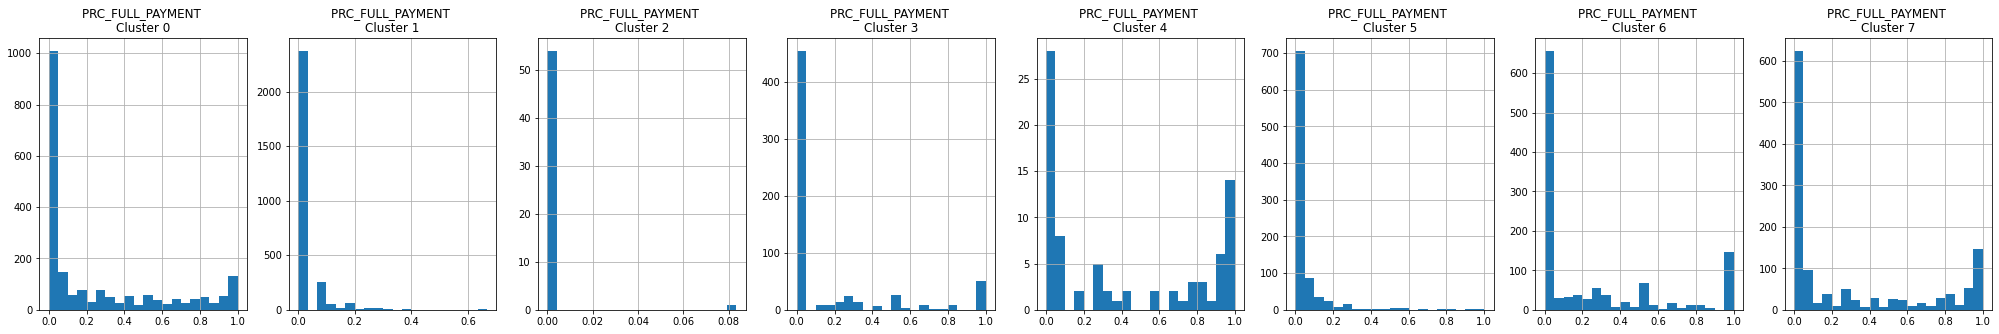

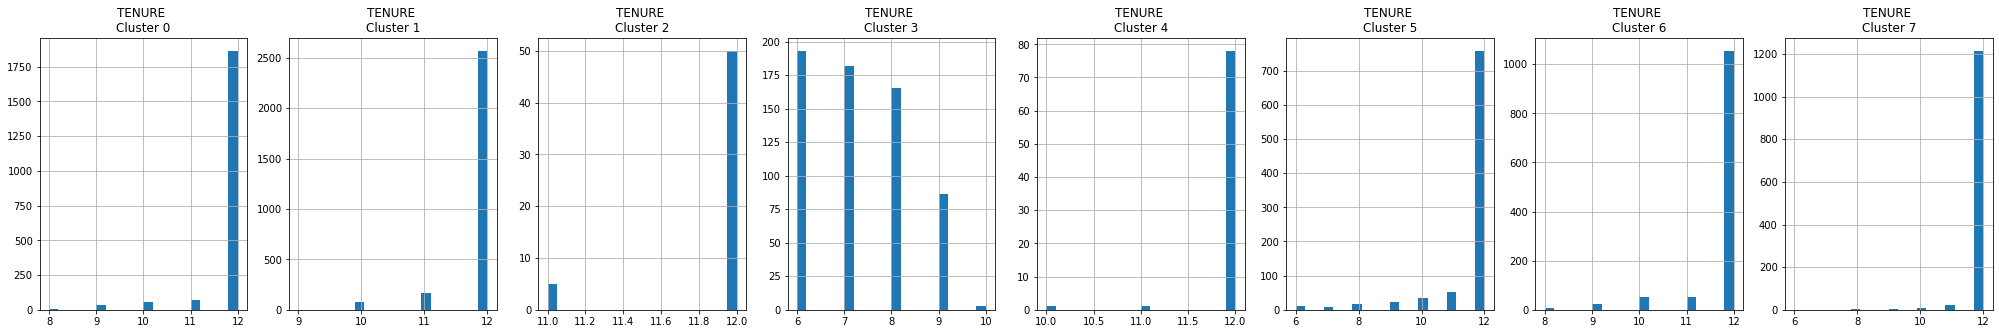

In [35]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [36]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'CLUSTER')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
3170,87.931814,0.909091,617.50,0.00,617.50,0.000000,0.833333,0.0,0.833333,0.00,0,10,4000.0,740.045839,150.708825,0.818182,12,0
1610,2763.049499,1.000000,1921.85,1715.55,206.30,0.000000,0.916667,0.5,0.666667,0.00,0,20,3050.0,1614.551200,2228.715586,0.000000,12,0
6625,37.618883,1.000000,952.80,0.00,952.80,0.000000,1.000000,0.0,1.000000,0.00,0,12,2000.0,938.376189,165.291104,0.916667,12,0
1607,799.518482,1.000000,339.96,0.00,339.96,830.316783,1.000000,0.0,1.000000,0.25,4,12,1000.0,361.021723,415.996627,0.000000,12,0
1606,22.728166,0.818182,262.50,0.00,262.50,0.000000,0.750000,0.0,0.666667,0.00,0,14,3500.0,301.677275,164.479393,1.000000,12,0


In [37]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1721,2288.014844,1.0,1753.46,1753.46,0.00,0.0,1.00,1.000000,0.000000,0.0,0,50,2500.0,989.999739,1121.296235,0.00,12,7
1720,5239.120768,1.0,1823.23,1823.23,0.00,0.0,0.75,0.750000,0.000000,0.0,0,14,5750.0,2107.740768,2658.139243,0.00,12,7
1719,161.792222,1.0,2883.58,1933.56,950.02,0.0,1.00,1.000000,0.166667,0.0,0,20,2000.0,3051.442623,185.380301,0.75,12,7
6480,395.722912,1.0,1837.15,1534.65,302.50,0.0,1.00,0.916667,0.916667,0.0,0,62,2000.0,914.845569,279.508067,0.50,12,7
3676,837.142436,1.0,5344.92,3666.78,1678.14,0.0,1.00,0.916667,1.000000,0.0,0,157,8500.0,4522.486550,222.642044,0.00,12,7


### TRANSFERING TO CSV

In [38]:
credit_ordered.to_csv('cluster.csv')

### APPLYING PCA (Principal Component Analysis) AND EDA

In [39]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221916, -1.07644877],
       [-1.13828962,  2.50648537],
       [ 0.96967892, -0.38353274],
       ...,
       [-0.92620403, -1.81078538],
       [-2.33655088, -0.65796201],
       [-0.55642441, -0.40047027]])

In [40]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076449
1,-1.138290,2.506485
2,0.969679,-0.383533
3,-0.873626,0.043166
4,-1.599433,-0.688579


In [41]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [42]:
pca_df

,pca1,pca2,cluster
0,-1.682219,-1.076449,1
1,-1.138290,2.506485,5
2,0.969679,-0.383533,7
3,-0.873626,0.043166,1
4,-1.599433,-0.688579,1
...,...,...,...
8945,-0.359630,-2.016145,3
8946,-0.564370,-1.639125,3
8947,-0.926204,-1.810785,3
8948,-2.336551,-0.657962,3


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

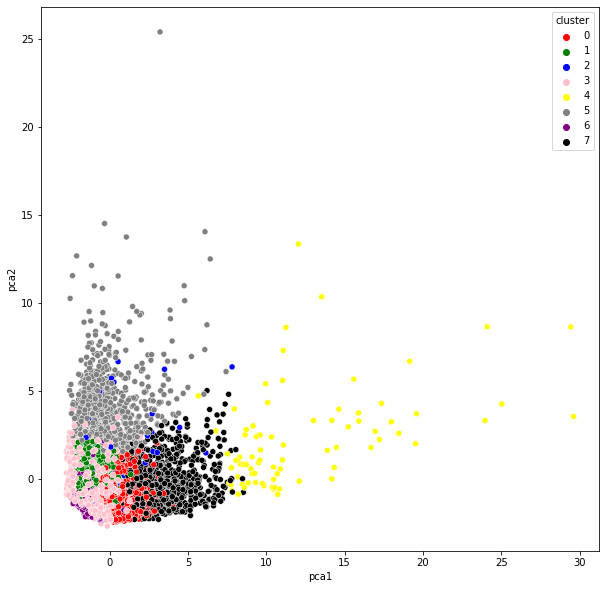

In [43]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

### APPLYING AUTOENCODERS

In [44]:
# Reduce from 17 to 10 attributes
# Elbow
# K-means
# PCA

In [45]:
creditcard_df_scaled.shape

(8950, 17)

In [46]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17

In [47]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [48]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

2022-02-23 20:44:54.172862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 20:44:54.280362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 20:44:54.281135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 20:44:54.282268: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [49]:
# Autoencoder
autoencoder = Model(input_df, decoded)

In [50]:
# Encoder
encoder = Model(input_df, encoded)

In [51]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [52]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

2022-02-23 20:44:56.564507: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
280/280 [==============================] - 2s 2ms/step - loss: 0.1794
Epoch 2/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0977
Epoch 3/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0629
Epoch 4/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0475
Epoch 5/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0421
Epoch 6/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0542
Epoch 7/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0504
Epoch 8/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0325
Epoch 9/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0376
Epoch 10/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0437
Epoch 11/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0347
Epoch 12/50
280/280 [==============================] - 1s 2ms/step - loss: 0.0414
Epoch 13/50
280/280 [====

In [53]:
compact = encoder.predict(creditcard_df_scaled)

In [54]:
compact.shape

(8950, 10)

In [55]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(compact)
        wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

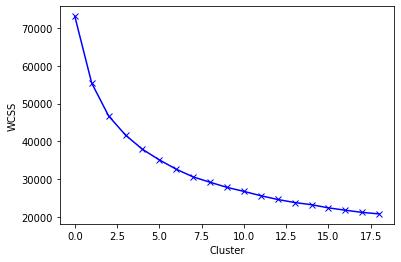

In [56]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  


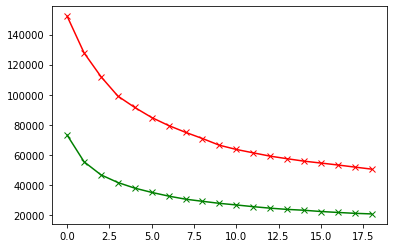

In [57]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g')

In [58]:
# Assuming 4 clusters

kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [59]:
labels = kmeans.labels_ 
labels, labels.shape

(array([3, 3, 3, ..., 0, 0, 0], dtype=int32), (8950,))

In [60]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [61]:
# Applying PCA again

pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.182144,-0.188528
1,0.585449,-1.362215
2,-1.263196,0.537586
3,-1.474606,0.032195
4,-0.871673,-0.216907


In [62]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.182144,-0.188528,3
1,0.585449,-1.362215,3
2,-1.263196,0.537586,3
3,-1.474606,0.032195,3
4,-0.871673,-0.216907,3


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

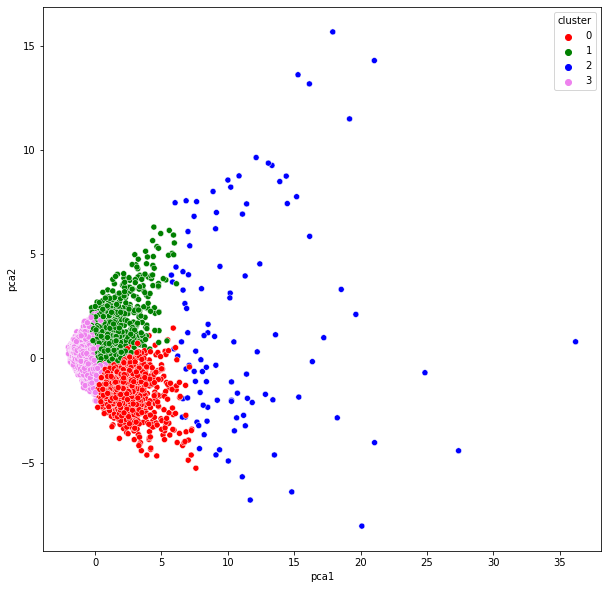

In [63]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'violet'])

In [64]:
df_cluster_ordered = df_cluster_at.sort_values(by='CLUSTER')
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
